## Loan Prediction

**Importing libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Accessing Google Drive from Colab**

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = "/content/gdrive/My Drive/train.csv"
train = pd.read_csv(path)# Dataset is now stored in a Pandas Dataframe

**Load Datasets**

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
path = "/content/gdrive/My Drive/test.csv"
test = pd.read_csv(path)# Dataset is now stored in a Pandas Dataframe

In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# EDA

Finding the NaN values

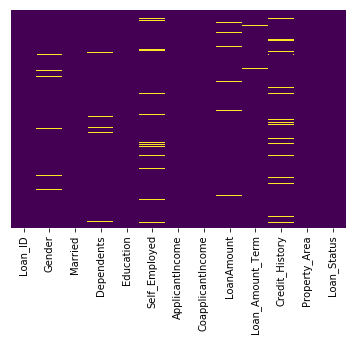

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

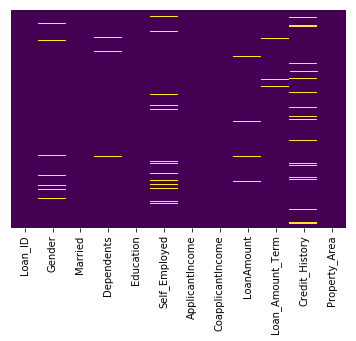

In [8]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Filling NaN values 

In [0]:
train['Gender']=train['Gender'].fillna(value='Male')
test['Gender']=test['Gender'].fillna(value='Male')

In [0]:
train['Dependents']=train['Dependents'].fillna(value='0')
test['Dependents']=test['Dependents'].fillna(value='0')

In [0]:
train['Self_Employed'] = train['Self_Employed'].fillna(value='No')
test['Self_Employed'] = test['Self_Employed'].fillna(value='No')

In [0]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(value=360)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(value=360)

In [0]:
train['Credit_History'] = train['Credit_History'].fillna(value=1)
test['Credit_History'] = test['Credit_History'].fillna(value=1)

In [0]:
train = pd.get_dummies(train,columns=['Gender','Married','Education','Self_Employed','Dependents','Credit_History','Property_Area','Loan_Status'],drop_first=True)
test = pd.get_dummies(test,columns=['Gender','Married','Education','Self_Employed','Dependents','Credit_History','Property_Area'],drop_first=True)

In [0]:
train = train.dropna()
test = test.dropna()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 16 columns):
Loan_ID                    592 non-null object
ApplicantIncome            592 non-null int64
CoapplicantIncome          592 non-null float64
LoanAmount                 592 non-null float64
Loan_Amount_Term           592 non-null float64
Gender_Male                592 non-null uint8
Married_Yes                592 non-null uint8
Education_Not Graduate     592 non-null uint8
Self_Employed_Yes          592 non-null uint8
Dependents_1               592 non-null uint8
Dependents_2               592 non-null uint8
Dependents_3+              592 non-null uint8
Credit_History_1.0         592 non-null uint8
Property_Area_Semiurban    592 non-null uint8
Property_Area_Urban        592 non-null uint8
Loan_Status_Y              592 non-null uint8
dtypes: float64(3), int64(1), object(1), uint8(11)
memory usage: 34.1+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 366
Data columns (total 15 columns):
Loan_ID                    362 non-null object
ApplicantIncome            362 non-null int64
CoapplicantIncome          362 non-null int64
LoanAmount                 362 non-null float64
Loan_Amount_Term           362 non-null float64
Gender_Male                362 non-null uint8
Married_Yes                362 non-null uint8
Education_Not Graduate     362 non-null uint8
Self_Employed_Yes          362 non-null uint8
Dependents_1               362 non-null uint8
Dependents_2               362 non-null uint8
Dependents_3+              362 non-null uint8
Credit_History_1.0         362 non-null uint8
Property_Area_Semiurban    362 non-null uint8
Property_Area_Urban        362 non-null uint8
dtypes: float64(2), int64(2), object(1), uint8(10)
memory usage: 20.5+ KB


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


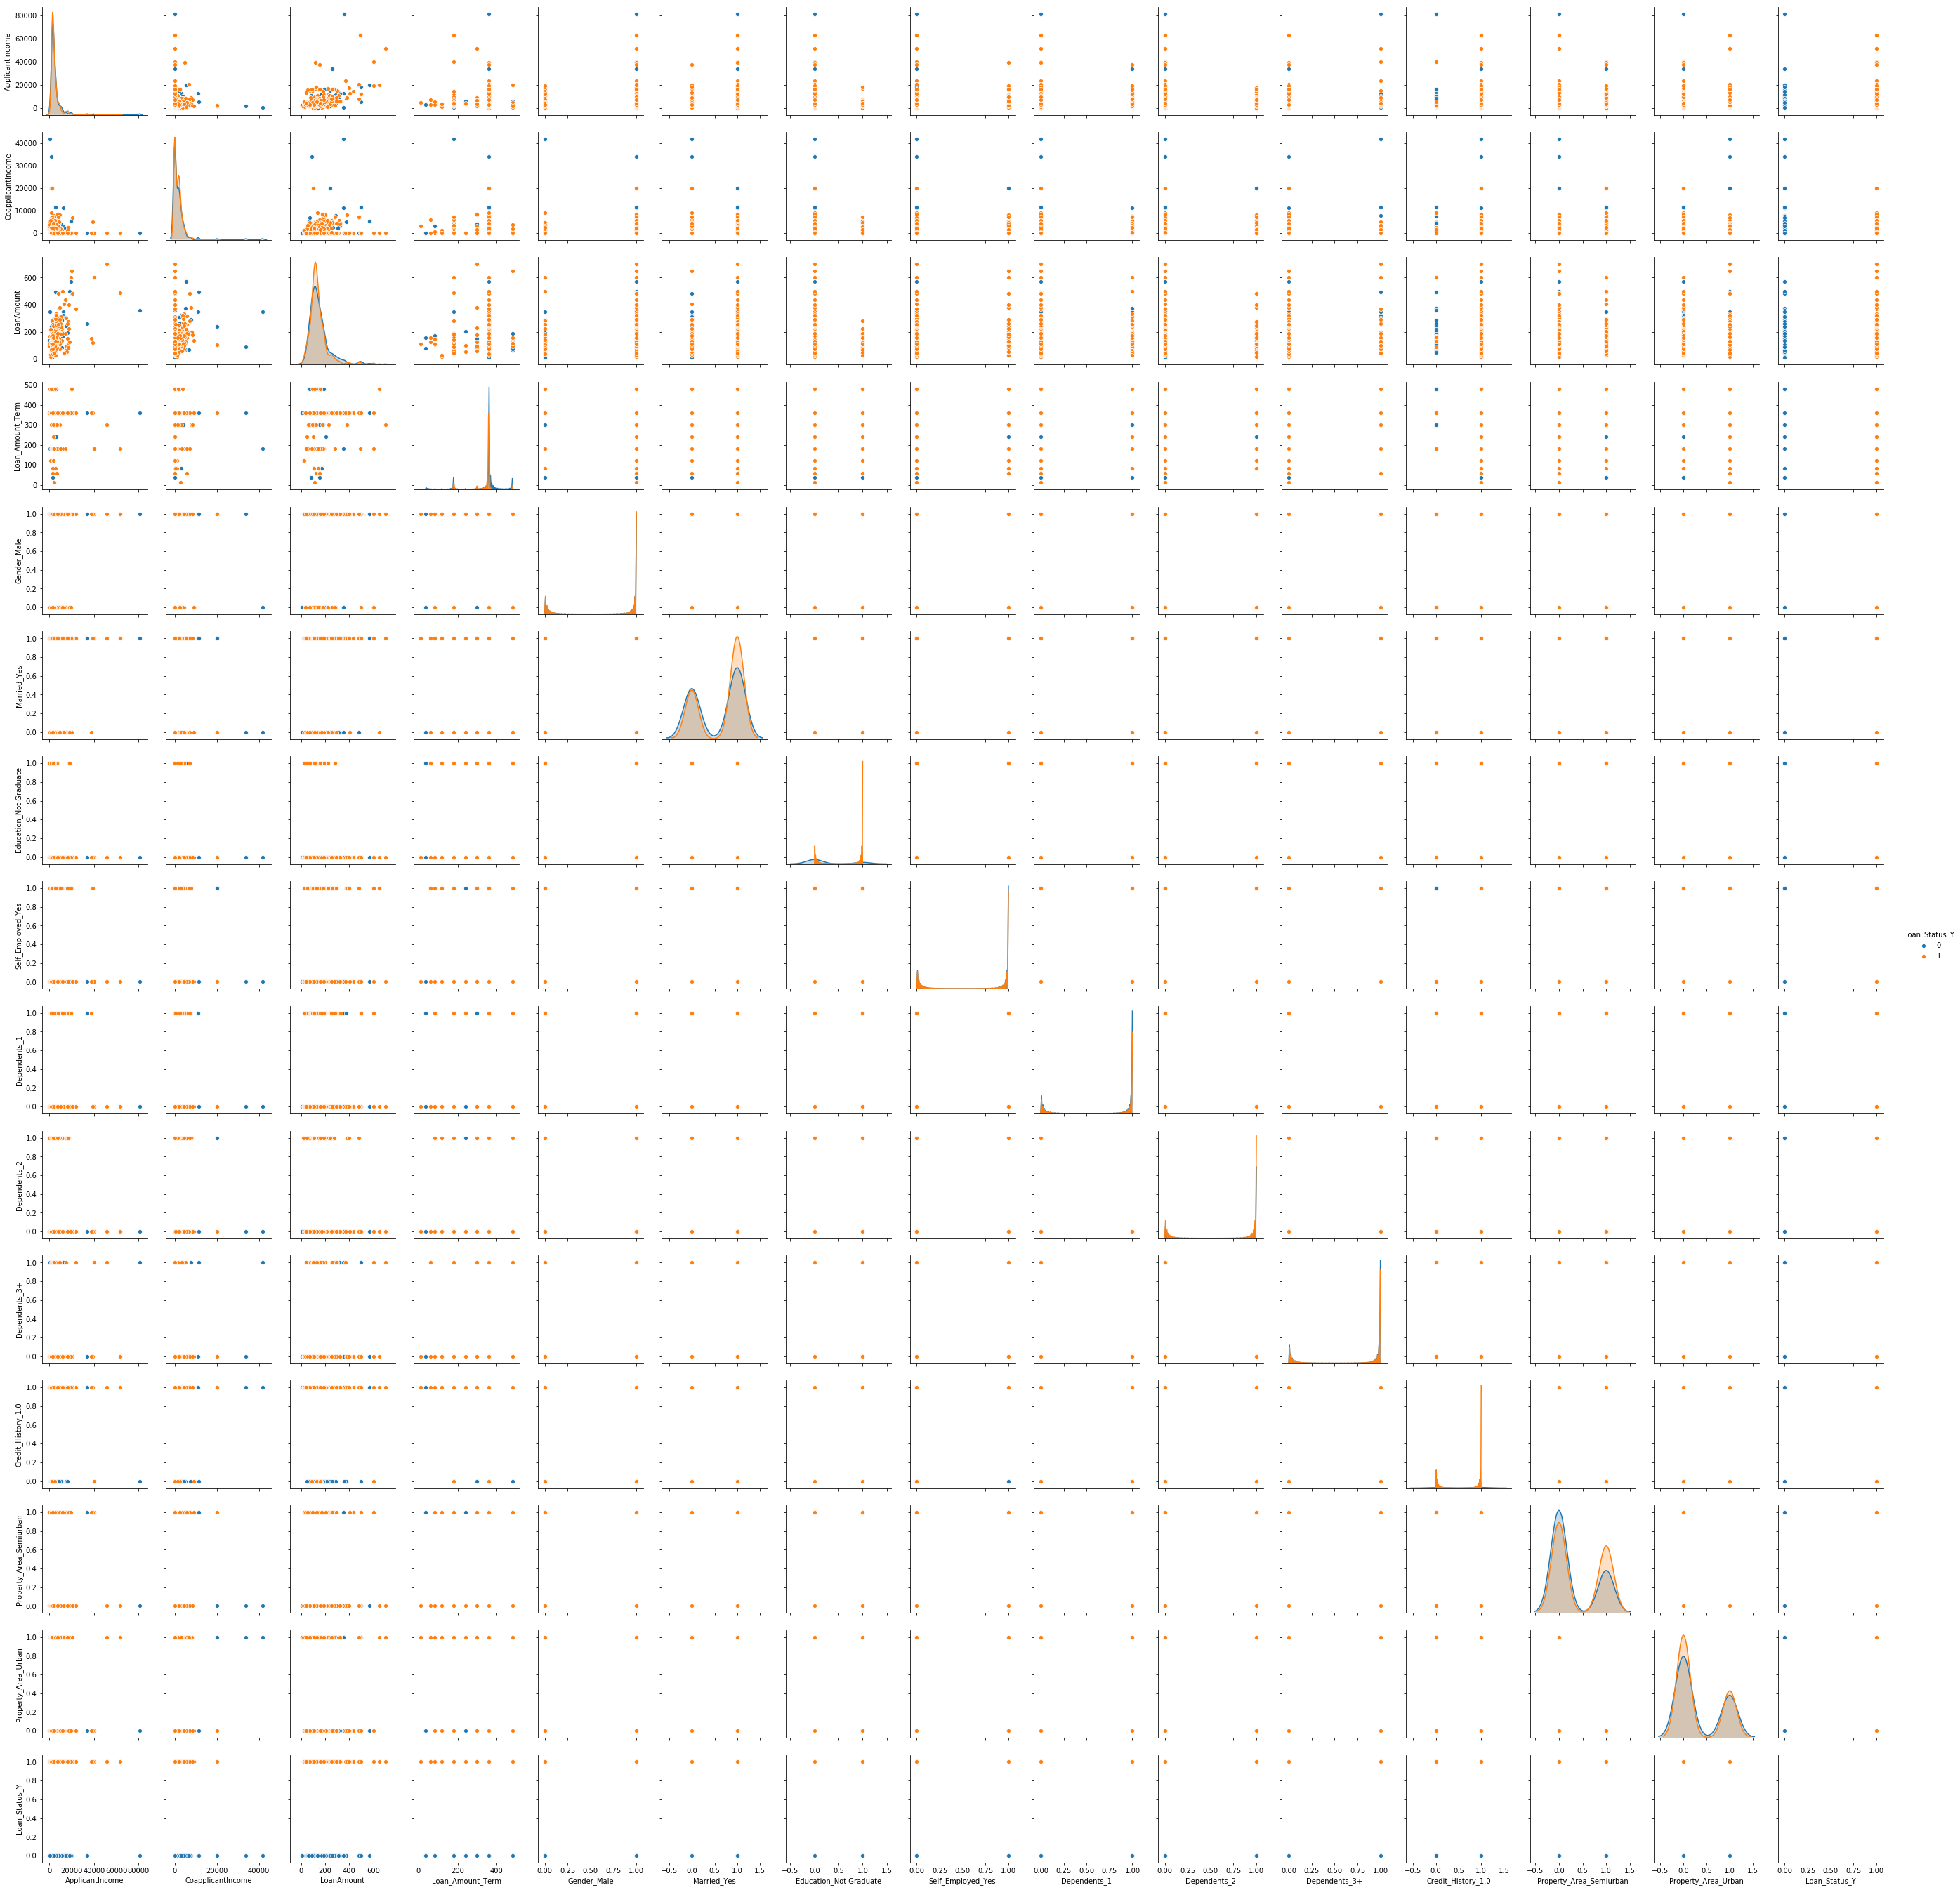

In [18]:
sns.pairplot(train,hue='Loan_Status_Y')

## **Splitting the Train data set for testing**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = train.drop(['Loan_ID','Loan_Status_Y'],axis = 1)
y = train['Loan_Status_Y']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel =LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predictions=logmodel.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=uint8)

#### Score of the model using Logistic Regression

In [0]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        56
           1       0.78      0.98      0.87       122

    accuracy                           0.80       178
   macro avg       0.83      0.69      0.71       178
weighted avg       0.81      0.80      0.77       178



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 23  33]
 [  3 119]]


## Now we will build the model using whole train data

#### Training the model using full dataset

In [28]:
logmodel =LogisticRegression()
logmodel.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [29]:
predictions=logmodel.predict(test.drop(['Loan_ID'],axis=1))
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [0]:
output = pd.DataFrame(data=predictions, index = test['Loan_ID'], columns=['Loan_Status'])

In [0]:
output['Loan_Status'] = output['Loan_Status'].apply(lambda x:'Y' if x==1 else'N')

#### Output according to Sample submission

In [32]:
output

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
LP001054,Y
LP001055,Y
LP001056,N
LP001059,Y


**Saving the output csv file to Google Drive**

In [33]:
from google.colab import drive
drive.mount('drive')

# After authentication, you can copy your csv file.

output.to_csv('404LoanStatus.csv')
!cp 404LoanStatus.csv drive/My\ Drive/

Mounted at drive


## Finding the  'Aproved_Amoumt' and 'Tenure' for non shortlisted loans

In [0]:
probabality = logmodel.predict_proba(test.drop(['Loan_ID'],axis=1))

In [0]:
testresult = test.copy()

In [0]:
pd_prob = pd.DataFrame(data=probabality,columns=[['P_No','P_Yes']])

In [0]:
testresult['Prob_Yes'] = pd_prob['P_Yes']

In [38]:
testresult = testresult.dropna()
testresult.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Prob_Yes
0,LP001015,5720,0,110.0,360.0,1,1,0,0,0,0,0,1,0,1,0.829773
1,LP001022,3076,1500,126.0,360.0,1,1,0,0,1,0,0,1,0,1,0.726455
2,LP001031,5000,1800,208.0,360.0,1,1,0,0,0,1,0,1,0,1,0.825892
3,LP001035,2340,2546,100.0,360.0,1,1,0,0,0,1,0,1,0,1,0.845331
4,LP001051,3276,0,78.0,360.0,1,0,1,0,0,0,0,1,0,1,0.688998


#### Creating one seperate DataFrame for people with negative loan status




In [39]:
result = testresult[['Loan_ID','LoanAmount','Prob_Yes','Loan_Amount_Term']]
result = result[result['Prob_Yes']<.5]
result

,Loan_ID,LoanAmount,Prob_Yes,Loan_Amount_Term
7,LP001056,147.0,0.150157,360.0
13,LP001094,166.0,0.345513,360.0
25,LP001153,148.0,0.027685,360.0
35,LP001203,176.0,0.193072,360.0
55,LP001313,130.0,0.131145,360.0
58,LP001323,176.0,0.278174,360.0
63,LP001347,108.0,0.111215,360.0
66,LP001352,135.0,0.212993,360.0
67,LP001358,130.0,0.287654,360.0
69,LP001361,188.0,0.117669,360.0


#### Approved Amount = (0.5 + Probablity of getting loan) * Loan Amount

In [0]:
result['Approved_Amount'] = (0.5+result['Prob_Yes'])*result['LoanAmount']

#### Extended Tenure = ((1 - Probablity of getting loan)/2)*Loan_Amount_Term + Loan_Amount_Term



In [0]:
result['Tenure'] = ((1-result['Prob_Yes'])/2)*result['Loan_Amount_Term']+result['Loan_Amount_Term']


In [0]:
result['Tenure']=result['Tenure'].apply(int)

In [0]:
result = result.set_index(['Loan_ID'])


In [0]:
result.drop(['Prob_Yes'],axis=1,inplace=True)

In [45]:
result

,LoanAmount,Loan_Amount_Term,Approved_Amount,Tenure
Loan_ID,,,,
LP001056,147.0,360.0,95.573014,512
LP001094,166.0,360.0,140.355203,477
LP001153,148.0,360.0,78.097348,535
LP001203,176.0,360.0,121.980600,505
LP001313,130.0,360.0,82.048884,516
LP001323,176.0,360.0,136.958711,489
LP001347,108.0,360.0,66.011250,519
LP001352,135.0,360.0,96.254111,501
LP001358,130.0,360.0,102.395003,488


#### Converting to .csv and saving it to Google Drive

In [0]:
result.to_csv('404FailedLoanStatus.csv')
!cp 404FailedLoanStatus.csv drive/My\ Drive/